<a href="https://colab.research.google.com/github/isaevadaryna/Machine-Learning/blob/main/%D0%86%D1%81%D0%B0%D1%94%D0%B2%D0%B0_%D0%94_%D0%9E_%2C_%D0%A4%D0%86%D0%A2%2C_4_9_(%D0%97%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

sns.set(style='whitegrid')
RANDOM_STATE = 42

In [2]:
sheet_url = "https://docs.google.com/spreadsheets/d/186DiUE0u88RgI0AFmut1piW9SniCLnpieaiZOK0JHtE/export?format=csv"
df_cal = pd.read_csv(sheet_url)
print("Колонки:", df_cal.columns.tolist())

Колонки: ['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built', 'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price']


In [3]:
print(df_cal.head())

   Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0            1360             2              1        1981  0.599637   
1            4272             3              3        2016  4.753014   
2            3592             1              2        2016  3.634823   
3             966             1              2        1977  2.730667   
4            4926             2              1        1993  4.699073   

   Garage_Size  Neighborhood_Quality   House_Price  
0            0                     5  2.623829e+05  
1            1                     6  9.852609e+05  
2            0                     9  7.779774e+05  
3            1                     8  2.296989e+05  
4            0                     8  1.041741e+06  


In [5]:
# Беремо останню колонку як target
target_column = df_cal.columns[-1]
print("Цільова колонка:", target_column)

Цільова колонка: House_Price



Пропуски:
 Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64
Дублікати: 0

Типи даних:
 Square_Footage            int64
Num_Bedrooms              int64
Num_Bathrooms             int64
Year_Built                int64
Lot_Size                float64
Garage_Size               int64
Neighborhood_Quality      int64
House_Price             float64
dtype: object

Кореляція з target:
 Square_Footage          0.991261
Lot_Size                0.160412
Garage_Size             0.052133
Year_Built              0.051967
Num_Bedrooms            0.014633
Num_Bathrooms          -0.001862
Neighborhood_Quality   -0.007770
Name: House_Price, dtype: float64


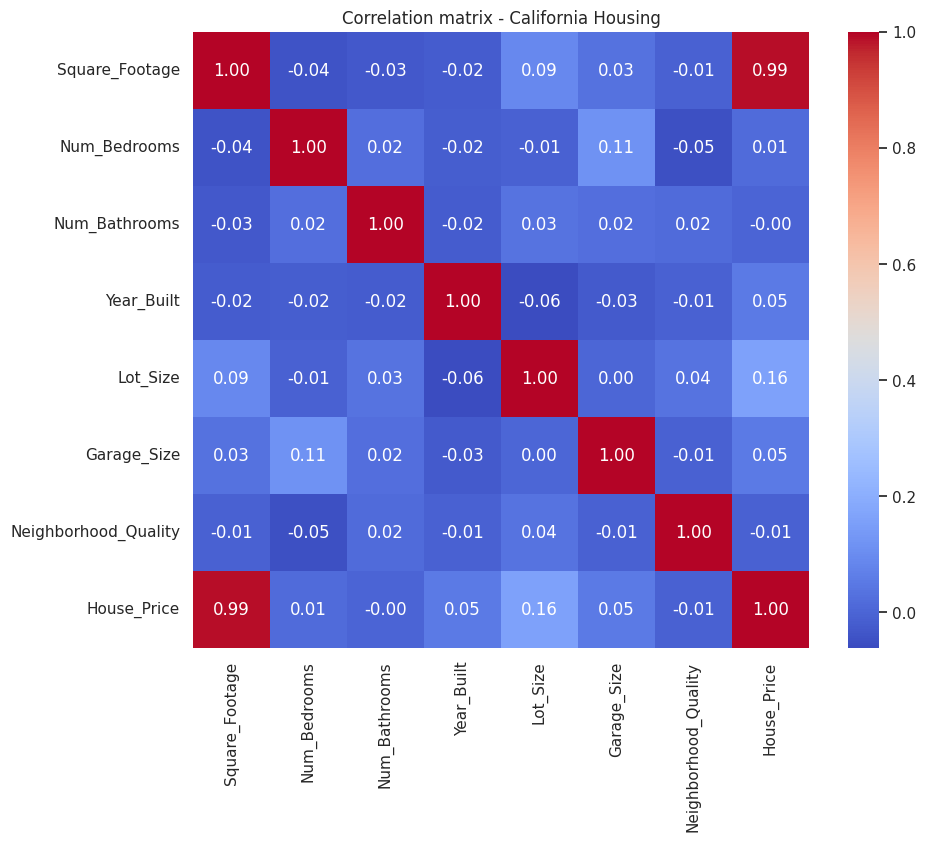

In [6]:
# Пропуски
print("\nПропуски:\n", df_cal.isnull().sum())

# Дублікати
dups = df_cal.duplicated().sum()
print(f"Дублікати: {dups}")
if dups > 0:
    df_cal = df_cal.drop_duplicates()
    print("Дублікати видалено")

# Типи даних
print("\nТипи даних:\n", df_cal.dtypes)

# Кореляція з target
corr_with_target = df_cal.corr()[target_column].drop(target_column).sort_values(ascending=False)
print("\nКореляція з target:\n", corr_with_target)

# Теплова карта
plt.figure(figsize=(10,8))
sns.heatmap(df_cal.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation matrix - California Housing")
plt.show()

In [7]:
features = df_cal.drop(columns=[target_column])
target = df_cal[target_column]

scaler = StandardScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, target, test_size=0.2, random_state=RANDOM_STATE
)
print("X_train.shape:", X_train.shape, "X_test.shape:", X_test.shape)

X_train.shape: (800, 7) X_test.shape: (200, 7)


In [9]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Ridge Regression з GridSearch
ridge = Ridge()
ridge_params = {'alpha':[0.01,0.1,1,10,50,100]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train, y_train)
y_pred_ridge = ridge_grid.predict(X_test)
print("Ridge optimal alpha:", ridge_grid.best_params_['alpha'])

# Random Forest з GridSearch
rf = RandomForestRegressor(random_state=RANDOM_STATE)
rf_params = {'n_estimators':[50,100,200], 'max_depth':[None,5,10]}
rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring='r2')
rf_grid.fit(X_train, y_train)
y_pred_rf = rf_grid.predict(X_test)
print("Random Forest best params:", rf_grid.best_params_)

Ridge optimal alpha: 0.01
Random Forest best params: {'max_depth': 10, 'n_estimators': 100}


In [10]:
def evaluate_model(y_true, y_pred, name):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    print(f"{name} -> R2: {r2:.3f}, MSE: {mse:.3f}")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

Linear Regression -> R2: 0.998, MSE: 101434798.506
Ridge Regression -> R2: 0.998, MSE: 101444289.537
Random Forest -> R2: 0.994, MSE: 400038896.880


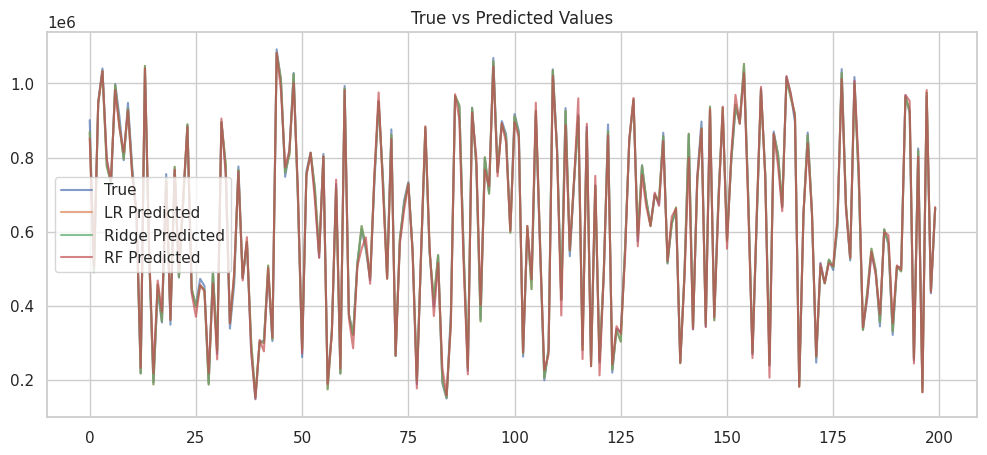

In [11]:
plt.figure(figsize=(12,5))
plt.plot(y_test.values, label="True", alpha=0.7)
plt.plot(y_pred_lr, label="LR Predicted", alpha=0.7)
plt.plot(y_pred_ridge, label="Ridge Predicted", alpha=0.7)
plt.plot(y_pred_rf, label="RF Predicted", alpha=0.7)
plt.legend()
plt.title("True vs Predicted Values")
plt.show()

In [12]:
res_df_cal = pd.DataFrame({
    "True": y_test.values,
    "LR_Pred": y_pred_lr,
    "Ridge_Pred": y_pred_ridge,
    "RF_Pred": y_pred_rf
})
print(res_df_cal.head(20))

            True       LR_Pred    Ridge_Pred       RF_Pred
0   9.010005e+05  8.686871e+05  8.686838e+05  8.513676e+05
1   4.945375e+05  4.903379e+05  4.903393e+05  5.084668e+05
2   9.494042e+05  9.456671e+05  9.456627e+05  9.485858e+05
3   1.040389e+06  1.033403e+06  1.033398e+06  1.033478e+06
4   7.940100e+05  7.766988e+05  7.766971e+05  7.973899e+05
5   7.240336e+05  7.324441e+05  7.324424e+05  7.371400e+05
6   9.984392e+05  9.950520e+05  9.950466e+05  9.824097e+05
7   9.097134e+05  8.851748e+05  8.851709e+05  8.792441e+05
8   7.926815e+05  7.967305e+05  7.967283e+05  8.145631e+05
9   9.474908e+05  9.317411e+05  9.317380e+05  9.267389e+05
10  7.741500e+05  7.594867e+05  7.594853e+05  7.498388e+05
11  6.544669e+05  6.454094e+05  6.454087e+05  6.549472e+05
12  2.174624e+05  2.177062e+05  2.177117e+05  2.321790e+05
13  1.034380e+06  1.047437e+06  1.047432e+06  1.040861e+06
14  5.304761e+05  5.369853e+05  5.369863e+05  5.512319e+05
15  1.943537e+05  1.878686e+05  1.878736e+05  2.180531e+